In [1]:
# Import required package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os.path

In [2]:
#Read the data from csv file and convert them into pandas dataframe
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
#to get information about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [5]:
# there are 21 columns and 21613 rows
# there is no null or missing values
# there is a data column which needs to be changed to datatime 
# zipcode can be changed into object 
# yr_built and yr_renovated can also be changed to object


In [6]:
#to get more information about the numerical data in our dataset
# get min, max, mean, std, quartiles for all the numerical columns/features
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
# The maximum price of a house using max function. It is also be find using pandas describe method.
max(df.price)

7700000.0

In [8]:
# The minimum price of a house 
min(df.price)

75000.0

In [9]:
# The average price of a house
df.price.mean()

540088.1417665294

In [10]:
# The median price of house
df.price.median()

450000.0

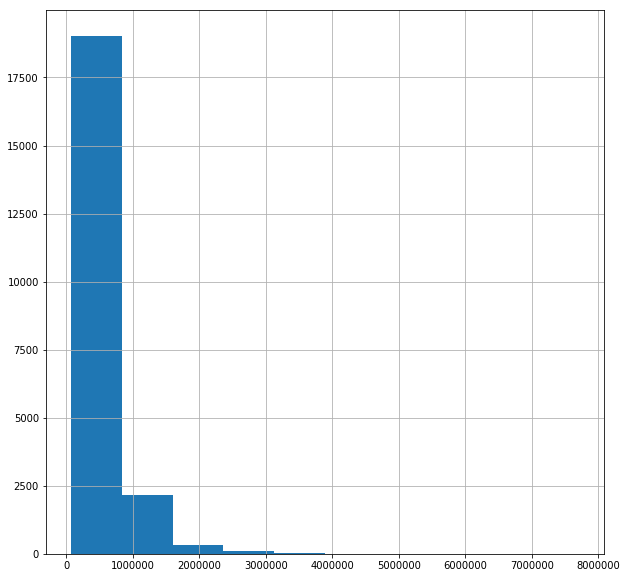

In [11]:
# The price of the house is right skewed, so there might be some outliers.
df.price.hist(figsize=(10,10))

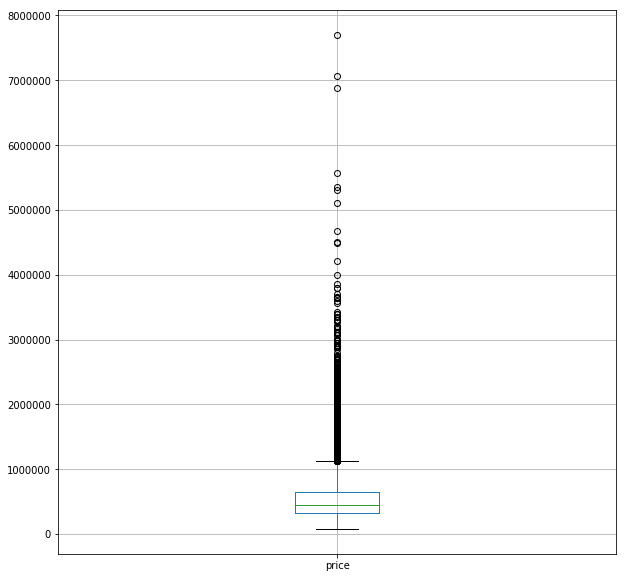

In [12]:
# Using the boxplot we can see if there are any outliers.
df.boxplot('price', figsize= (10,10))

In [13]:
# find top 10 expensive house and see what are their features
# Make sure they are not mistake or bad input data
df[['id','price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','condition','grade','sqft_basement']].sort_values('price',ascending=False).head(10)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement
7252,6762700020,7700000.0,6,8.00,12050,27600,2.5,0,4,13,3480
3914,9808700762,7062500.0,5,4.50,10040,37325,2.0,1,3,11,2360
9254,9208900037,6885000.0,6,7.75,9890,31374,2.0,0,3,13,1030
4411,2470100110,5570000.0,5,5.75,9200,35069,2.0,0,3,13,3000
1448,8907500070,5350000.0,5,5.00,8000,23985,2.0,0,3,12,1280
1315,7558700030,5300000.0,6,6.00,7390,24829,2.0,1,4,12,2390
1164,1247600105,5110800.0,5,5.25,8010,45517,2.0,1,3,12,2020
8092,1924059029,4668000.0,5,6.75,9640,13068,1.0,1,3,12,4820
2626,7738500731,4500000.0,5,5.50,6640,40014,2.0,1,3,12,290
8638,3835500195,4489000.0,4,3.00,6430,27517,2.0,0,3,12,0


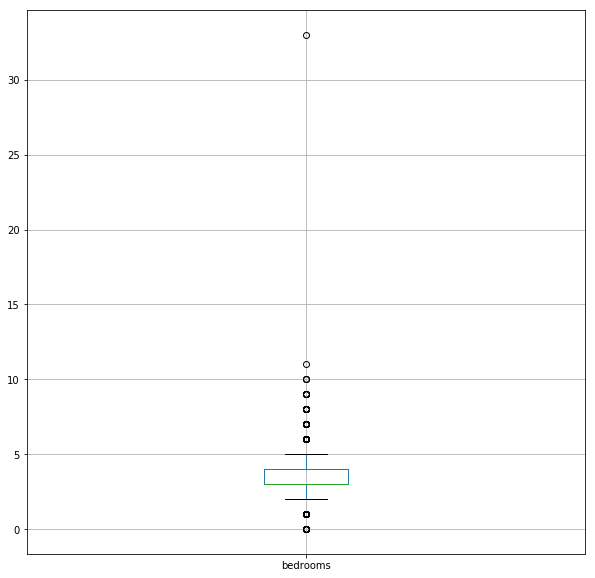

In [14]:
# Check for the outliers in bedrooms column.
df.boxplot('bedrooms', figsize= (10,10))

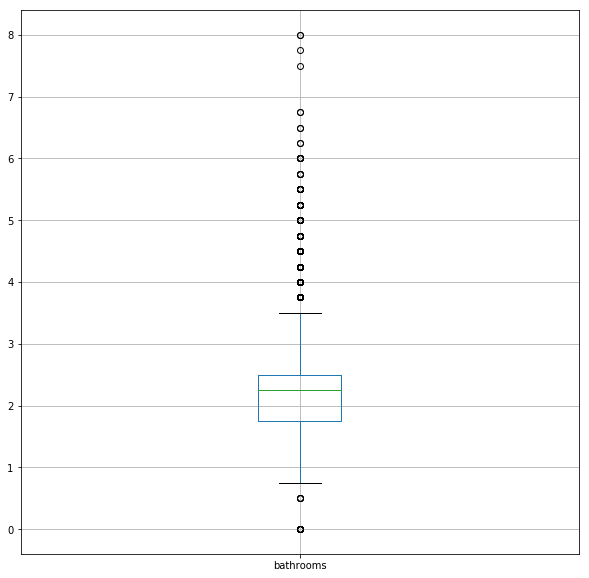

In [15]:
df.boxplot('bathrooms', figsize= (10,10))

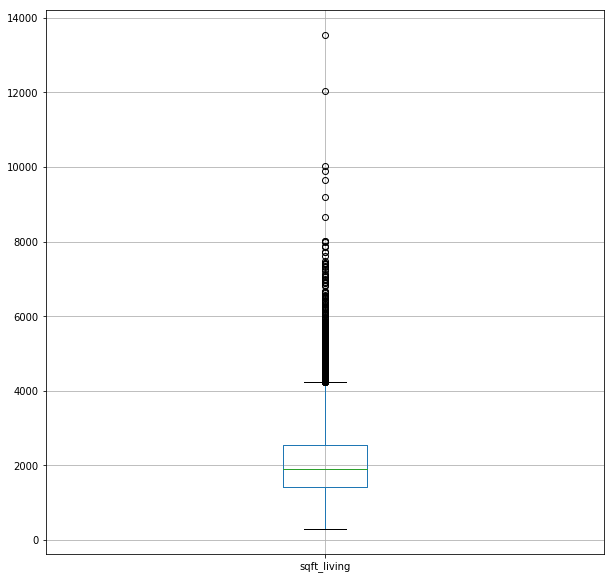

In [16]:
df.boxplot('sqft_living', figsize= (10,10))

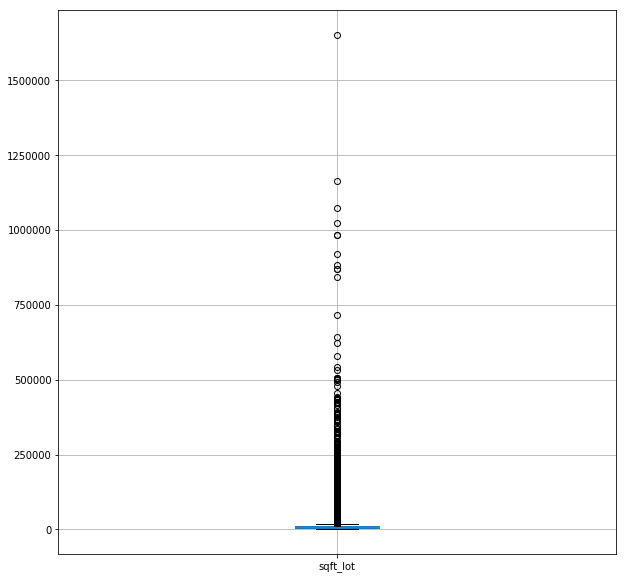

In [17]:
df.boxplot('sqft_lot', figsize= (10,10))

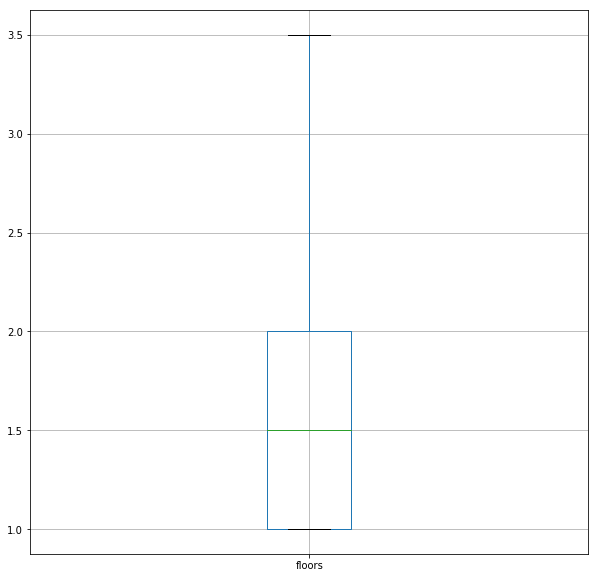

In [18]:
df.boxplot('floors', figsize= (10,10))

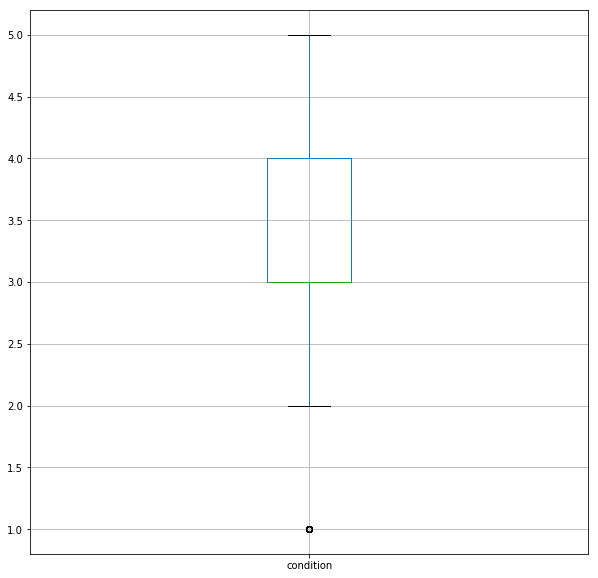

In [19]:
df.boxplot('condition', figsize= (10,10))

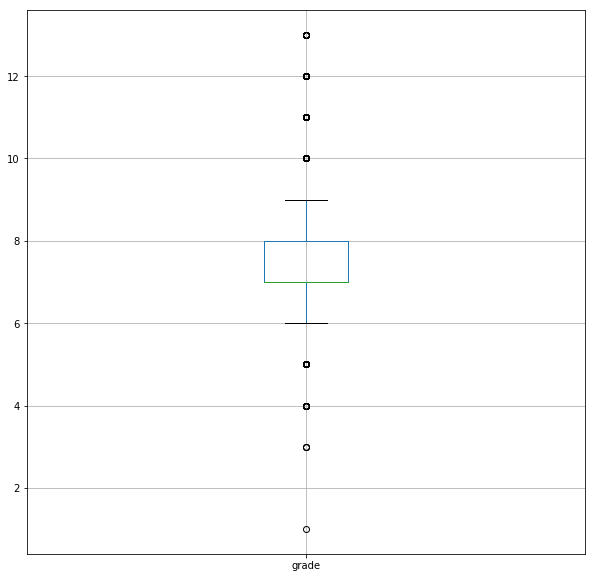

In [20]:
df.boxplot('grade', figsize= (10,10))

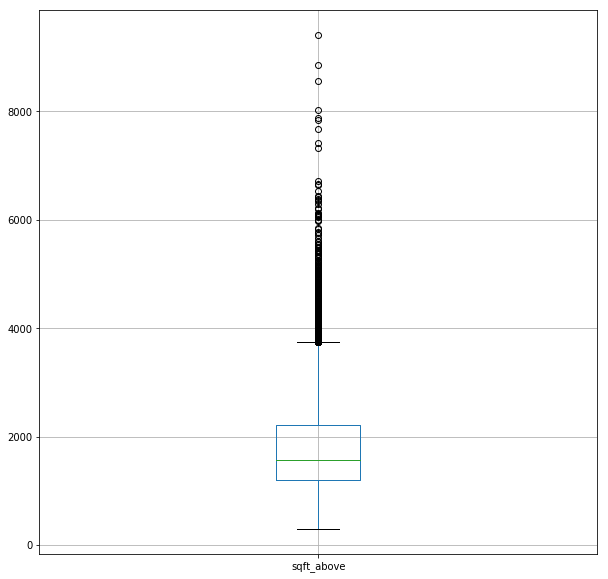

In [21]:
df.boxplot('sqft_above', figsize= (10,10))

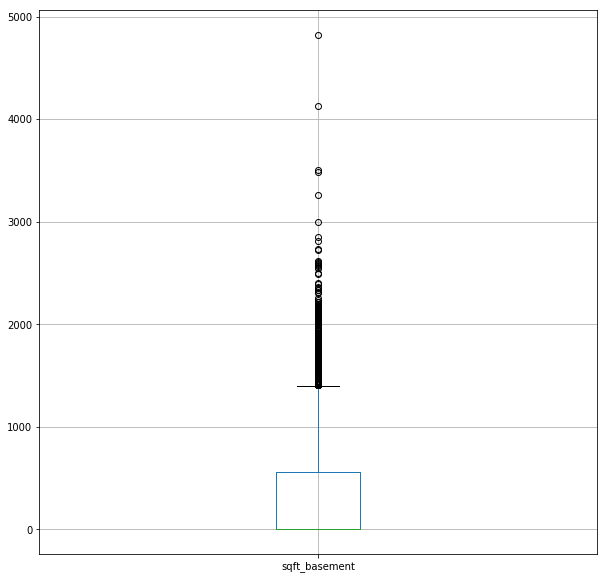

In [22]:
df.boxplot('sqft_basement', figsize= (10,10))

In [23]:
df[(df.bedrooms>7)][['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','grade']].sort_values('bedrooms',ascending=False).head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade
15870,640000.0,33,1.75,1620,6000,1.0,7
8757,520000.0,11,3.00,3000,4960,2.0,7
15161,650000.0,10,2.00,3610,11914,2.0,7
19254,660000.0,10,3.00,2920,3745,2.0,7
13314,1148000.0,10,5.25,4590,10920,1.0,9


In [24]:
# Convert date column from string to datetime
df['date'] = pd.to_datetime(df.date)

In [25]:
# sort the dataframe by date 
df.sort_values('date')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16768,5561000190,2014-05-02,437500.0,3,2.25,1970,35100,2.0,0,0,...,9,1970,0,1977,0,98027,47.4635,-121.991,2340,35100
9596,472000620,2014-05-02,790000.0,3,2.50,2600,4750,1.0,0,0,...,9,1700,900,1951,0,98117,47.6833,-122.400,2380,4750
9587,1024069009,2014-05-02,675000.0,5,2.50,2820,67518,2.0,0,0,...,8,2820,0,1979,0,98029,47.5794,-122.025,2820,48351
20602,7853361370,2014-05-02,555000.0,4,2.50,3310,6500,2.0,0,0,...,8,3310,0,2012,0,98065,47.5150,-121.870,2380,5000
11577,5056500260,2014-05-02,440000.0,4,2.25,2160,8119,1.0,0,0,...,8,1080,1080,1966,0,98006,47.5443,-122.177,1850,9000
20559,3438501320,2014-05-02,295000.0,2,2.50,1630,1368,2.0,0,0,...,7,1280,350,2009,0,98106,47.5489,-122.363,1590,2306
18690,1737320120,2014-05-02,470000.0,5,2.50,2210,9655,1.0,0,0,...,8,1460,750,1976,0,98011,47.7698,-122.222,2080,8633
1041,7197300105,2014-05-02,550000.0,4,2.50,1940,10500,1.0,0,0,...,7,1140,800,1976,0,98052,47.6830,-122.114,2200,10500
172,1999700045,2014-05-02,313000.0,3,1.50,1340,7912,1.5,0,0,...,7,1340,0,1955,0,98133,47.7658,-122.339,1480,7940
7734,1962200037,2014-05-02,626000.0,3,2.25,1750,1572,2.5,0,0,...,9,1470,280,2005,0,98102,47.6498,-122.321,2410,3050


In [26]:
# to check how many houses were sold on 2014
df[df.date<'2015-1-1'].price.count()

14633

In [27]:
# to check how many houses were sold on 2015
df[df.date>='2015-1-1'].price.count()

6980

In [28]:
df.sort_values(by=['id','date']).head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2496,1000102,2014-09-16,280000.0,6,3.00,2400,9373,2.0,0,0,...,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316
2497,1000102,2015-04-22,300000.0,6,3.00,2400,9373,2.0,0,0,...,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316
6735,1200019,2014-05-08,647500.0,4,1.75,2060,26036,1.0,0,0,...,8,1160,900,1947,0,98166,47.4444,-122.351,2590,21891
8411,1200021,2014-08-11,400000.0,3,1.00,1460,43000,1.0,0,0,...,7,1460,0,1952,0,98166,47.4434,-122.347,2250,20023
8809,2800031,2015-04-01,235000.0,3,1.00,1430,7599,1.5,0,0,...,6,1010,420,1930,0,98168,47.4783,-122.265,1290,10320


In [29]:
# Group the house by their ID
group_id = df.groupby('id').count()
# Find out how many houses were sold more than 1 times
group_id[group_id.date>1].date.count()

176

In [30]:
group_id[group_id.date>1].head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
1000102,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
7200179,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
109200390,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
123039336,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
251300110,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


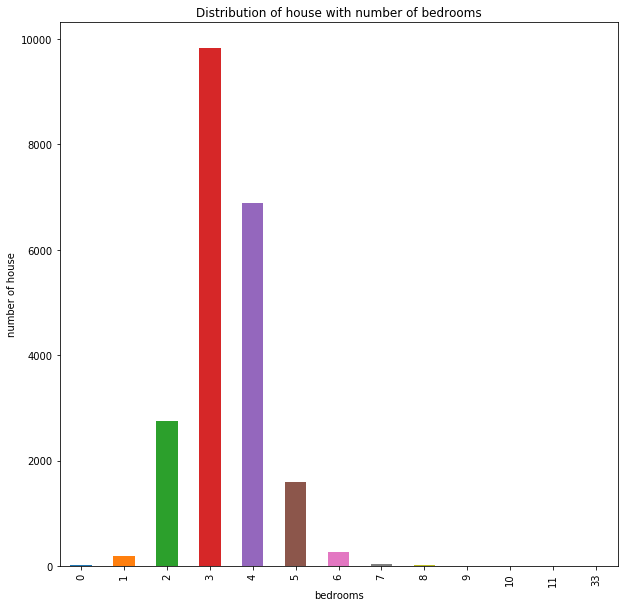

In [31]:
# group the house by bedrooms
# Most of the house have 3 bedrooms
group_bedrooms = df.groupby('bedrooms').count()
group_bedrooms.id.plot.bar(figsize=(10,10))
plt.ylabel('number of house')
plt.title('Distribution of house with number of bedrooms')
output_path = os.path.join('/Users/lakpa/Desktop/PredictHousePrice/DataVisualization','distribution_of_bedrooms.jpg')
plt.savefig(output_path)

In [32]:
group_bedrooms

,id,date,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,,,,,,,,,,,,,,,,,,,,
0,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
1,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199
2,2760,2760,2760,2760,2760,2760,2760,2760,2760,2760,2760,2760,2760,2760,2760,2760,2760,2760,2760,2760
3,9824,9824,9824,9824,9824,9824,9824,9824,9824,9824,9824,9824,9824,9824,9824,9824,9824,9824,9824,9824
4,6882,6882,6882,6882,6882,6882,6882,6882,6882,6882,6882,6882,6882,6882,6882,6882,6882,6882,6882,6882
5,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601
6,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272
7,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38
8,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13


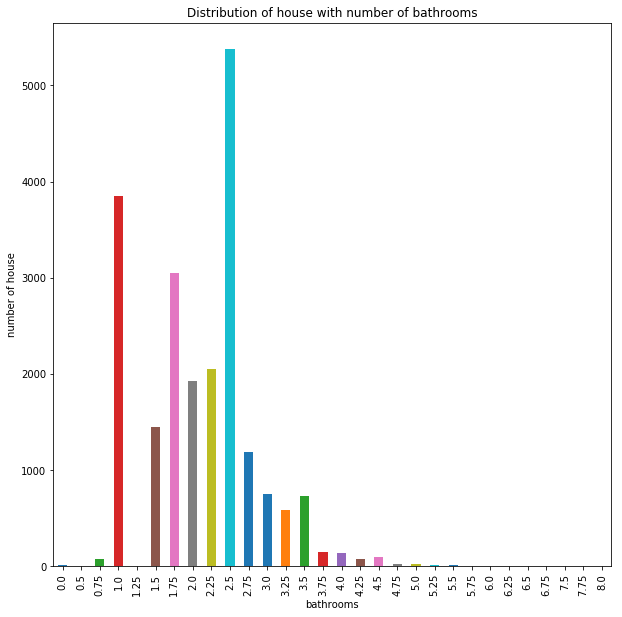

In [33]:
# group the house by bathrooms
# Most of the houses have 2.5 bathrooms
group_bathrooms = df.groupby('bathrooms').count()
group_bathrooms.id.plot.bar(figsize=(10,10))
plt.ylabel('number of house')
plt.title('Distribution of house with number of bathrooms')
output_path = os.path.join('/Users/lakpa/Desktop/PredictHousePrice/DataVisualization','distribution_of_bathrooms.jpg')
plt.savefig(output_path)

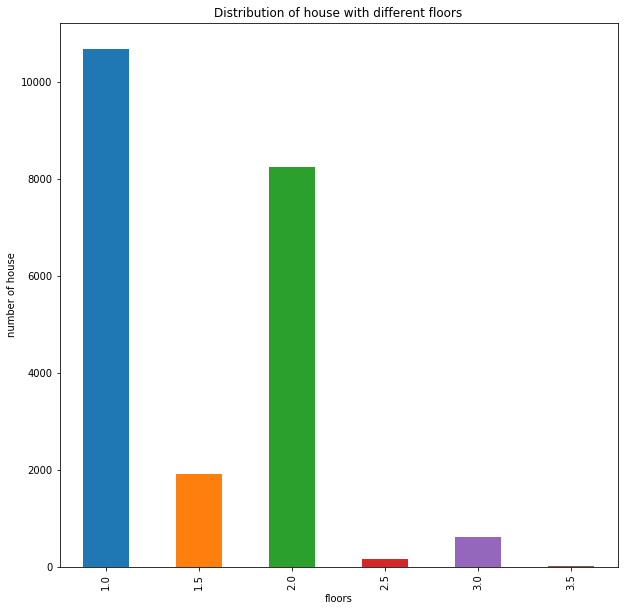

In [34]:
# group the house by floors
# Most of the house are 1 floor
group_floors = df.groupby('floors').count()
group_floors.id.plot.bar(figsize=(10,10))
plt.ylabel('number of house')
plt.title('Distribution of house with different floors')
output_path = os.path.join('/Users/lakpa/Desktop/PredictHousePrice/DataVisualization','distribution_of_floors.jpg')
plt.savefig(output_path)

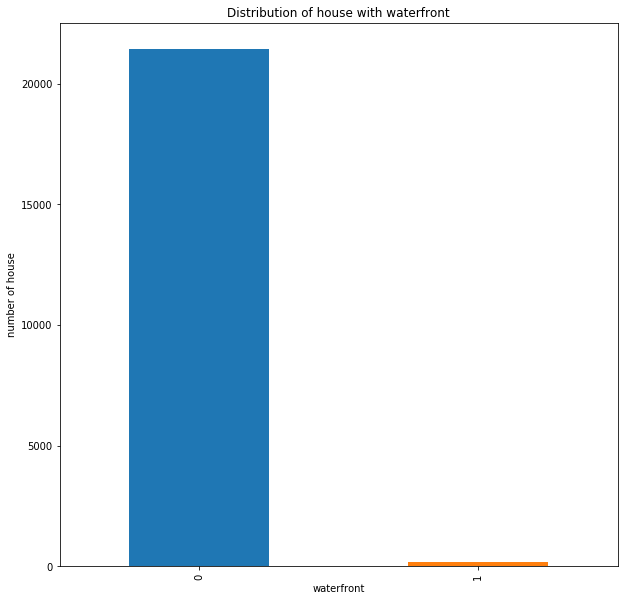

In [35]:
# group the house by waterfront
# Most of the house doesnot have waterfront
group_waterfront = df.groupby('waterfront').count()
group_waterfront.id.plot.bar(figsize=(10,10))
plt.ylabel('number of house')
plt.title('Distribution of house with waterfront')
output_path = os.path.join('/Users/lakpa/Desktop/PredictHousePrice/DataVisualization','distribution_of_waterfront.jpg')
plt.savefig(output_path)

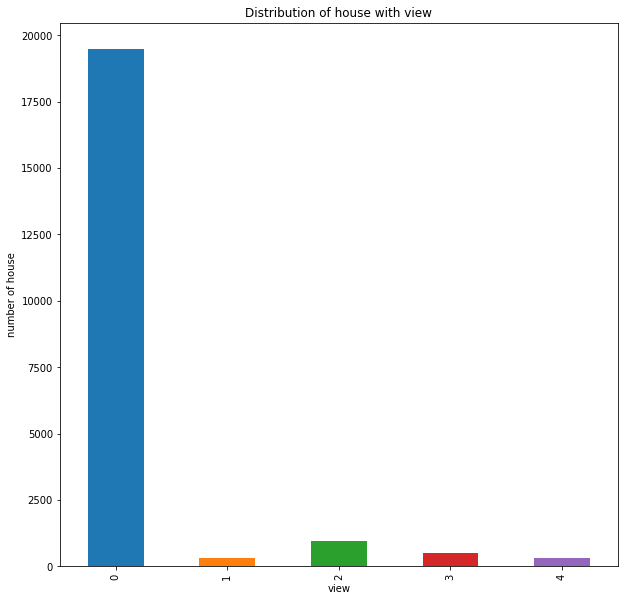

In [36]:
# group the house by view
# Most of the house have 0 viewed.
group_view = df.groupby('view').count()
group_view.id.plot.bar(figsize=(10,10))
plt.ylabel('number of house')
plt.title('Distribution of house with view')
output_path = os.path.join('/Users/lakpa/Desktop/PredictHousePrice/DataVisualization','distribution_of_view.jpg')
plt.savefig(output_path)

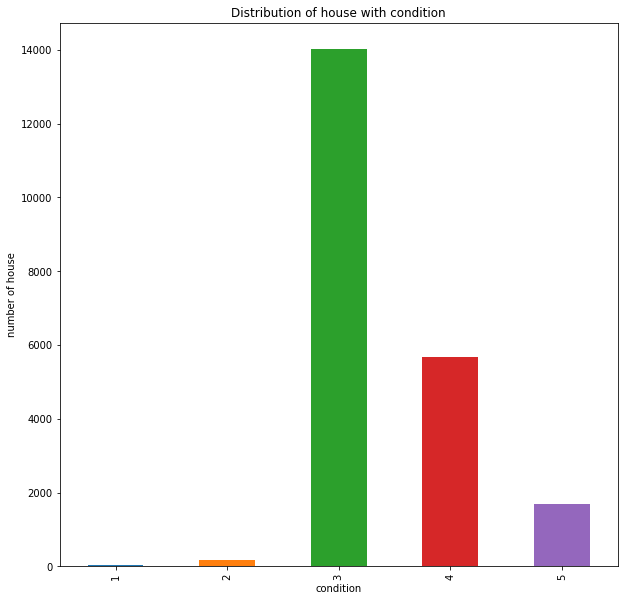

In [37]:
# group the house by condition, how good the condition is 
# Most of the house has condition as 3 (3 means Average)
# https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r
group_condition = df.groupby('condition').count()
group_condition.id.plot.bar(figsize=(10,10))
plt.ylabel('number of house')
plt.title('Distribution of house with condition')
output_path = os.path.join('/Users/lakpa/Desktop/PredictHousePrice/DataVisualization','distribution_of_condition.jpg')
plt.savefig(output_path)

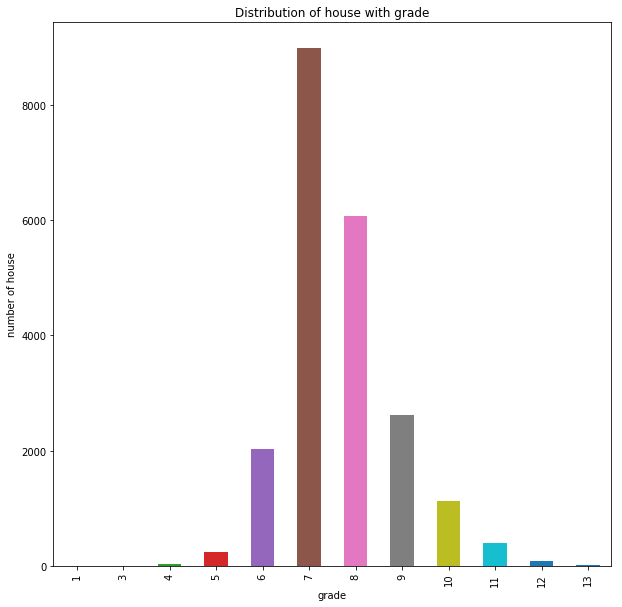

In [38]:
# group the house by grade, overall grade given by the housing unit
# Most of the house are of grade 7 (7 means Average grade)
# https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r
group_grade = df.groupby('grade').count()
group_grade.id.plot.bar(figsize=(10,10))
plt.ylabel('number of house')
plt.title('Distribution of house with grade')
output_path = os.path.join('/Users/lakpa/Desktop/PredictHousePrice/DataVisualization','distribution_of_grade.jpg')
plt.savefig(output_path)

In [39]:
# to group the house by with or without basement
# first create a column basement using sqft_basement
# if the house does not have basement the area sqft_basement is 0
df['basement'] = df['sqft_basement']
df.basement.head()

0      0
1    400
2      0
3    910
4      0
Name: basement, dtype: int64

In [40]:
# Change the house with basement to 1
df.loc[df.basement!=0,'basement'] = 1
df.basement.head()

0    0
1    1
2    0
3    1
4    0
Name: basement, dtype: int64

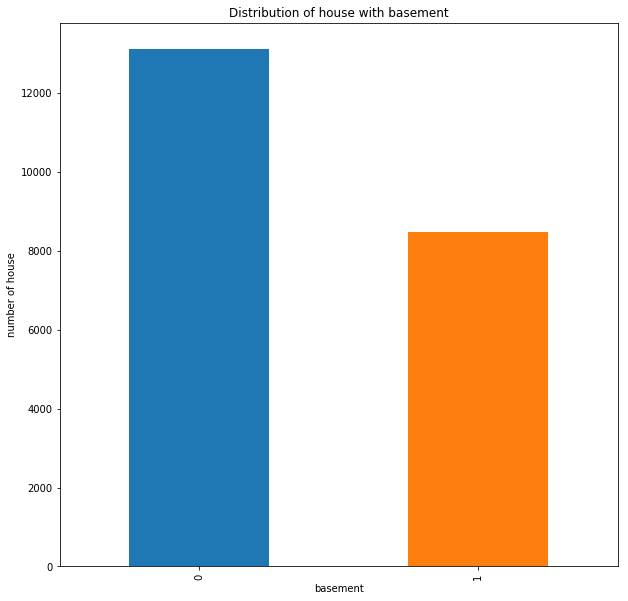

In [41]:
# group the house by with and without basement
# Most of the house does not have basement
group_basement = df.groupby('basement').count()
group_basement.id.plot.bar(figsize=(10,10))
plt.ylabel('number of house')
plt.title('Distribution of house with basement')
output_path = os.path.join('/Users/lakpa/Desktop/PredictHousePrice/DataVisualization','distribution_of_basement.jpg')
plt.savefig(output_path)

In [42]:
group_basement.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
basement,,,,,,,,,,,,,,,,,,,,,
0,13126,13126,13126,13126,13126,13126,13126,13126,13126,13126,...,13126,13126,13126,13126,13126,13126,13126,13126,13126,13126
1,8487,8487,8487,8487,8487,8487,8487,8487,8487,8487,...,8487,8487,8487,8487,8487,8487,8487,8487,8487,8487


In [43]:
# to group the house by renovated or not renovated
# first create a column renovated using yr_renovated
# if the house is not renovated the yr_renovated is 0, if renovated: yr_renovated
df['renovated'] = df['yr_renovated']
df.renovated.head()

0       0
1    1991
2       0
3       0
4       0
Name: renovated, dtype: int64

In [44]:
# Change the house with basement to 1
df.loc[df.renovated!=0,'renovated'] = 1
df.renovated.head()

0    0
1    1
2    0
3    0
4    0
Name: renovated, dtype: int64

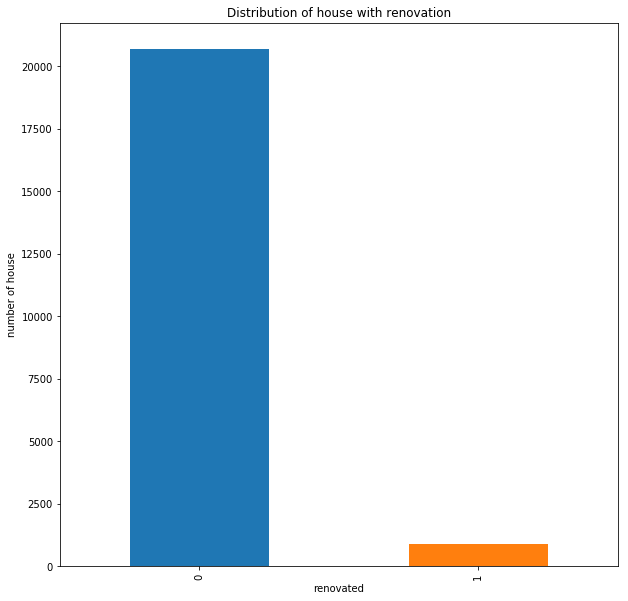

In [45]:
# group the house by renovated or not renovated
# Most of the house are not renovated
group_renovated = df.groupby('renovated').count()
group_renovated.id.plot.bar(figsize=(10,10))
plt.ylabel('number of house')
plt.title('Distribution of house with renovation')
output_path = os.path.join('/Users/lakpa/Desktop/PredictHousePrice/DataVisualization','distribution_of_renovation.jpg')
plt.savefig(output_path)

In [46]:
df[['id','sqft_living','sqft_lot','yr_renovated','sqft_living15','sqft_lot15','renovated']].head()

,id,sqft_living,sqft_lot,yr_renovated,sqft_living15,sqft_lot15,renovated
0,7129300520,1180,5650,0,1340,5650,0
1,6414100192,2570,7242,1991,1690,7639,1
2,5631500400,770,10000,0,2720,8062,0
3,2487200875,1960,5000,0,1360,5000,0
4,1954400510,1680,8080,0,1800,7503,0


sqft_living15Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area

sqft_lot15lotSize area in 2015(implies-- some renovations)

In [47]:
df[(df.sqft_living != df.sqft_living15) & (df.sqft_lot != df.sqft_lot15)][['id','bedrooms','sqft_living','sqft_lot','yr_renovated','sqft_living15','sqft_lot15','renovated']].head()

,id,bedrooms,sqft_living,sqft_lot,yr_renovated,sqft_living15,sqft_lot15,renovated
1,6414100192,3,2570,7242,1991,1690,7639,1
2,5631500400,2,770,10000,0,2720,8062,0
4,1954400510,3,1680,8080,0,1800,7503,0
9,3793500160,3,1890,6560,0,2390,7570,0
10,1736800520,3,3560,9796,0,2210,8925,0


In [48]:
df.price.describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [49]:
max(df.price)

7700000.0

In [50]:
min(df.price)

75000.0

In [51]:
#to work with price group, create a list of price group to use as a bins
#create a new column with column label 'price_bin'
bins = [0,100000,300000,500000,800000,1000000,3000000,5000000,8000000]
df['price_bin']= pd.cut(df['price'], bins)

In [52]:
# check how many houses belong to different price range
df.price_bin.value_counts().sort_index()

(0, 100000]             31
(100000, 300000]      4539
(300000, 500000]      7990
(500000, 800000]      6108
(800000, 1000000]     1480
(1000000, 3000000]    1420
(3000000, 5000000]      38
(5000000, 8000000]       7
Name: price_bin, dtype: int64

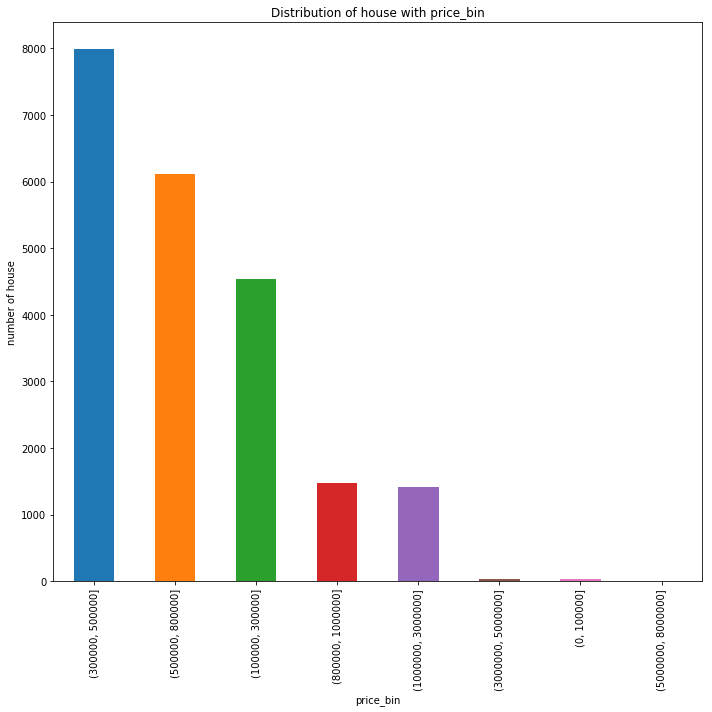

In [53]:
# Most of the house are priced 300,000 to 500,000
# There are only 31 houses which has price less than 100,000
# There are 7 houses which has price 5,000,000 to 8,000,000
df.price_bin.value_counts().plot.bar(figsize=(10,10))
plt.ylabel('number of house')
plt.xlabel('price_bin')
plt.title('Distribution of house with price_bin')
plt.tight_layout()
output_path = os.path.join('/Users/lakpa/Desktop/PredictHousePrice/DataVisualization','distribution_of_price_bin.jpg')
plt.savefig(output_path)

In [54]:
df[['price','price_bin']].head()

,price,price_bin
0,221900.0,"(100000, 300000]"
1,538000.0,"(500000, 800000]"
2,180000.0,"(100000, 300000]"
3,604000.0,"(500000, 800000]"
4,510000.0,"(500000, 800000]"


In [55]:
group_price = df.groupby('price_bin').median()
group_price[['bedrooms','bathrooms','sqft_living','sqft_lot','condition','grade']]

,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade
price_bin,,,,,,
"(0, 100000]",2.0,1.000,790.0,8236.0,3.0,5.0
"(100000, 300000]",3.0,1.750,1400.0,7800.0,3.0,7.0
"(300000, 500000]",3.0,2.000,1750.0,7276.5,3.0,7.0
"(500000, 800000]",3.0,2.500,2250.0,7200.0,3.0,8.0
"(800000, 1000000]",4.0,2.500,2970.0,8729.5,3.0,9.0
"(1000000, 3000000]",4.0,3.250,3610.0,10747.5,3.0,10.0
"(3000000, 5000000]",4.5,4.125,5465.0,18746.0,3.0,11.0
"(5000000, 8000000]",5.0,5.750,9200.0,31374.0,3.0,12.0


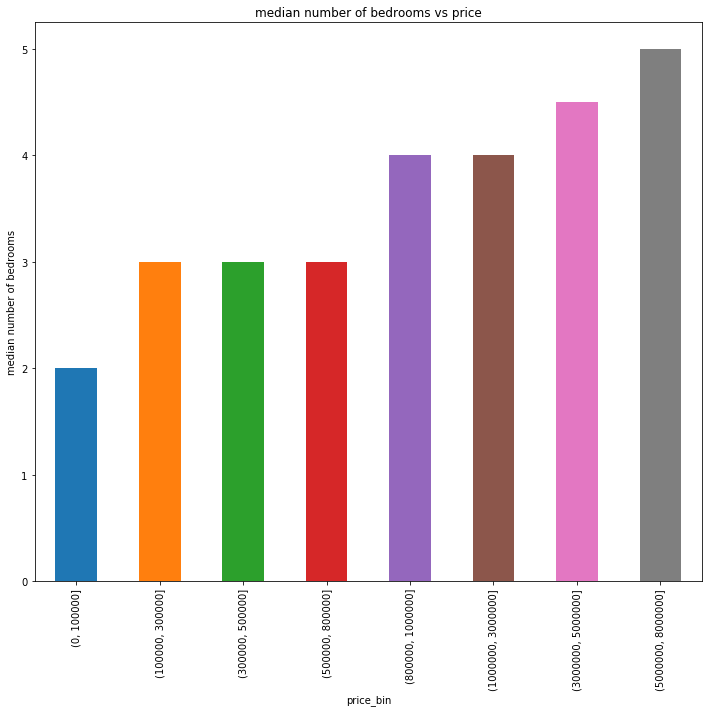

In [56]:
# Houses 5,000,000 to 8,000,000 has median 5 bedrooms
# Houses priced less than 100,000 has median 2 bedrooms
# Houses with more bedrooms are more expensive
# Houses with less bedrooms are less expensive
group_price.bedrooms.plot.bar(figsize=(10,10))
plt.ylabel('median number of bedrooms')
plt.title('median number of bedrooms vs price')
plt.tight_layout()
output_path = os.path.join('/Users/lakpa/Desktop/PredictHousePrice/DataVisualization','median_number_of_bedrooms_vs_price_bin.jpg')
plt.savefig(output_path)

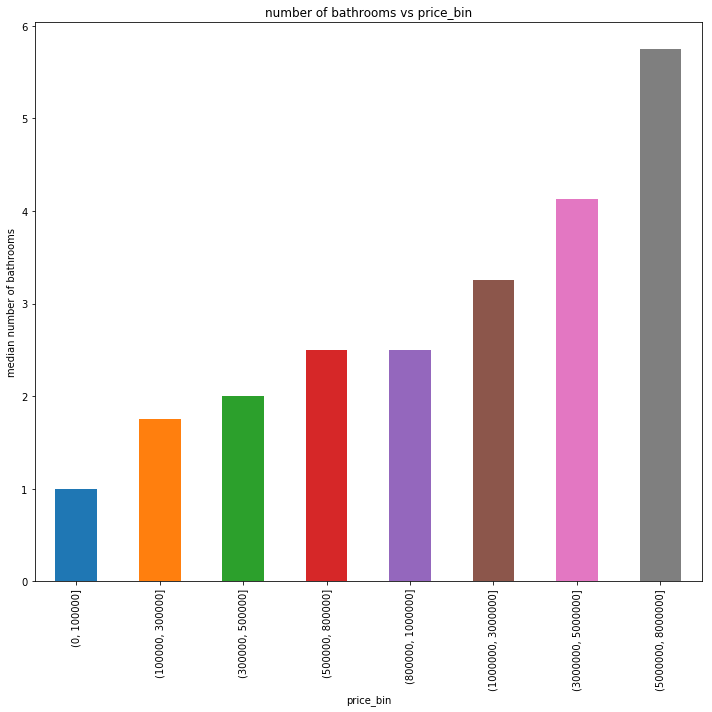

In [57]:
# Houses 5,000,000 to 8,000,000 has median 5.75 bathrooms
# Houses priced less than 100,000 has median 1 bathroom
# Houses with more bathrooms are more expensive
# Houses with less bathrooms are less expensive
group_price.bathrooms.plot.bar(figsize=(10,10))
plt.ylabel('median number of bathrooms')
plt.title('number of bathrooms vs price_bin')
plt.tight_layout()
output_path = os.path.join('/Users/lakpa/Desktop/PredictHousePrice/DataVisualization','median_number_of_bathrooms_vs_price_bin.jpg')
plt.savefig(output_path)

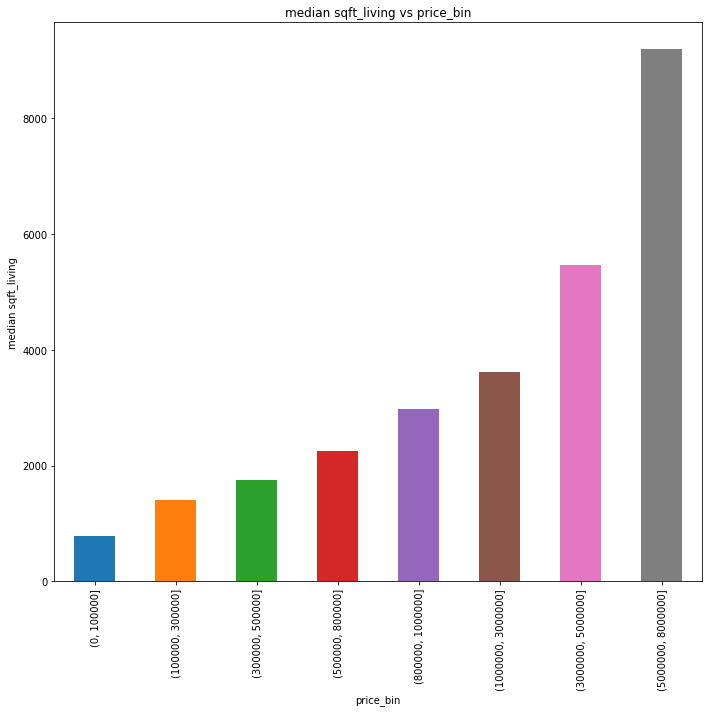

In [58]:
# Houses with larger sqft_living are more expensive
# Houses with less sqft_living are less expensive
group_price.sqft_living.plot.bar(figsize=(10,10))
plt.ylabel('median sqft_living')
plt.title('median sqft_living vs price_bin')
plt.tight_layout()
output_path = os.path.join('/Users/lakpa/Desktop/PredictHousePrice/DataVisualization','median_house_sqft_living_vs_price_bin.jpg')
plt.savefig(output_path)

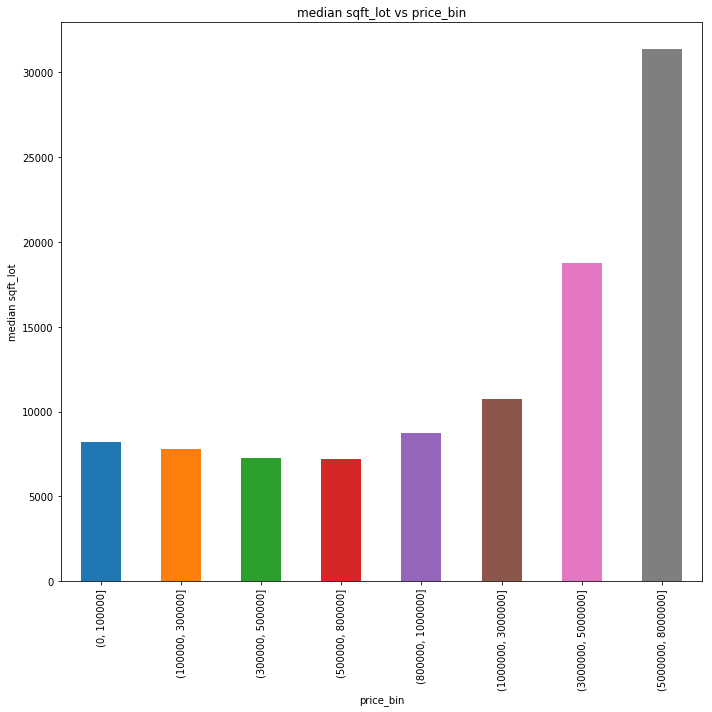

In [59]:
# House priced less than 1,000,000 lot size reduces with price 
# House priced more than 1,000,000 shows house with higher lot size is more expensive 
group_price.sqft_lot.plot.bar(figsize=(10,10))
plt.ylabel('median sqft_lot')
plt.title('median sqft_lot vs price_bin')
plt.tight_layout()
output_path = os.path.join('/Users/lakpa/Desktop/PredictHousePrice/DataVisualization','median_house_sqft_lot_vs_price_bin.jpg')
plt.savefig(output_path)

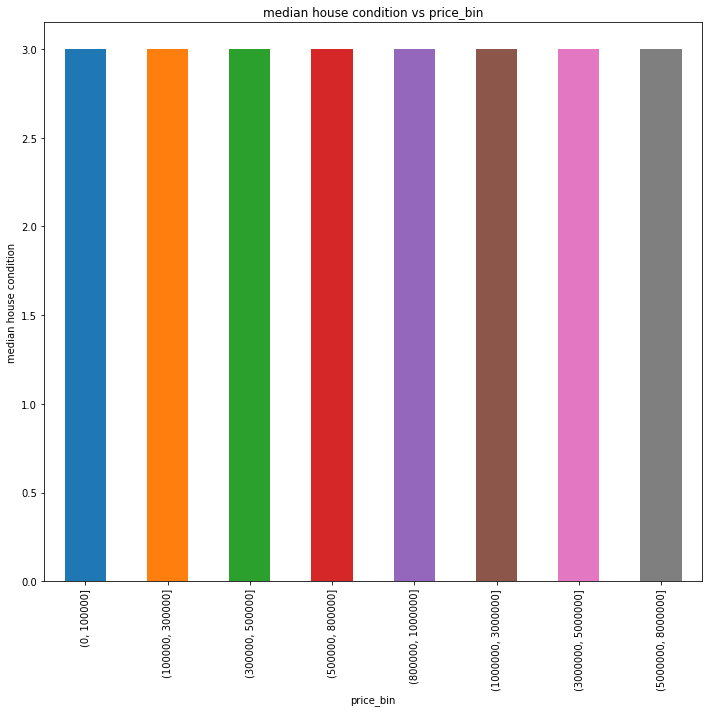

In [60]:
# Most of the houses have level 3 condition for  (3 is average condition). 
# https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r
group_price.condition.plot.bar(figsize=(10,10))
plt.ylabel('median house condition')
plt.title('median house condition vs price_bin')
plt.tight_layout()
output_path = os.path.join('/Users/lakpa/Desktop/PredictHousePrice/DataVisualization','median_house_condition_vs_price_bin.jpg')
plt.savefig(output_path)

In [61]:
group_price[['bedrooms','bathrooms','sqft_living','sqft_lot','condition','grade']]

,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade
price_bin,,,,,,
"(0, 100000]",2.0,1.000,790.0,8236.0,3.0,5.0
"(100000, 300000]",3.0,1.750,1400.0,7800.0,3.0,7.0
"(300000, 500000]",3.0,2.000,1750.0,7276.5,3.0,7.0
"(500000, 800000]",3.0,2.500,2250.0,7200.0,3.0,8.0
"(800000, 1000000]",4.0,2.500,2970.0,8729.5,3.0,9.0
"(1000000, 3000000]",4.0,3.250,3610.0,10747.5,3.0,10.0
"(3000000, 5000000]",4.5,4.125,5465.0,18746.0,3.0,11.0
"(5000000, 8000000]",5.0,5.750,9200.0,31374.0,3.0,12.0


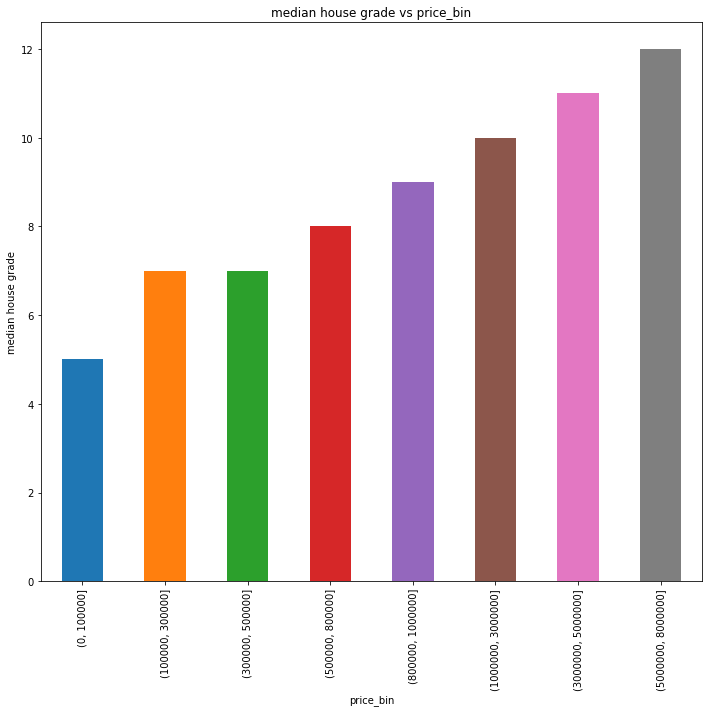

In [62]:
# Houses 5,000,000 to 8,000,000 has median grade of 12 (12 means custom design and excellent)
# Houses 300,000 to 500,000 has median grade of 7 (7 means Average)
# Houses priced less than 100,000 has median grade of 5 (5 means low costs, small, simple)
# Better grade houses are more expensive
# lower grade houses are less expensive
group_price.grade.plot.bar(figsize=(10,10))
plt.ylabel('median house grade')
plt.title('median house grade vs price_bin')
plt.tight_layout()
plt.savefig('median_house_grade_vs_price_bin.jpg')

In [63]:
# Define a function to plot a scatter plot with regression line
def reg_plot(x_input,y_input,data):
    _ = plt.subplots(figsize=(10,5))
    # Plot the illiteracy rate versus fertility
    _ = plt.plot(data[x_input], data[y_input], marker='.', linestyle='none')
    plt.margins(0.02)
    _ = plt.xlabel(x_input)
    _ = plt.ylabel(y_input)
    # Perform a linear regression using np.polyfit(): a, b
    a, b = np.polyfit(data[x_input], data[y_input],1)
    # Print the results to the screen
    print('slope =', a)
    print('intercept =', b)
    # Make theoretical line to plot
    x = np.array([0,max(data[x_input])]) #array consists of 0 and 4000
    y = a * x + b
    # Add regression line to your plot
    _ = plt.plot(x, y)
    # Draw and save the plot
    plt.tight_layout()
    output_path = os.path.join('/Users/lakpa/Desktop/PredictHousePrice/DataVisualization',x_input+'_'+y_input+'_'+'orginal_scatterplot.jpg')
    plt.savefig(output_path)
    plt.show()

slope = 121716.12651183766
intercept = 129802.35631825952


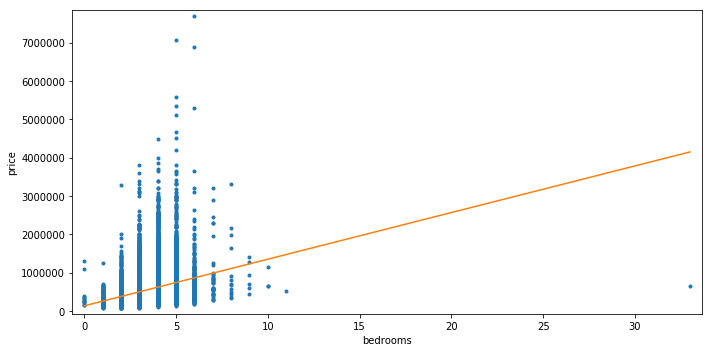

In [64]:
# scatter plot for bedroom vs price
reg_plot('bedrooms', 'price', data=df)

slope = 250326.51630210306
intercept = 10708.308530374943


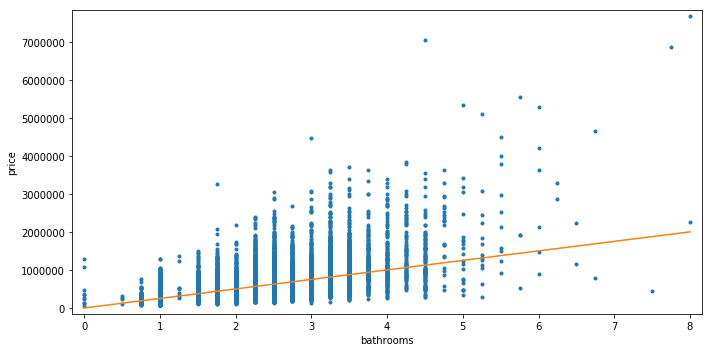

In [65]:
# scatter plot for bathroom vs price
reg_plot('bathrooms', 'price', data=df)

slope = 280.6235678974484
intercept = -43580.743094474194


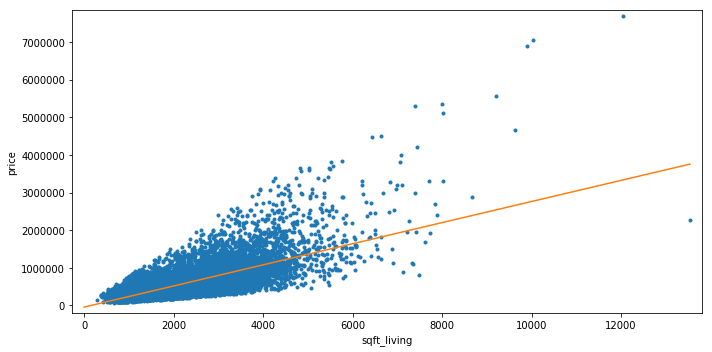

In [66]:
# scatter plot for sqft_living vs price
reg_plot('sqft_living', 'price', data=df)

slope = 0.7947014456724004
intercept = 528082.6128022476


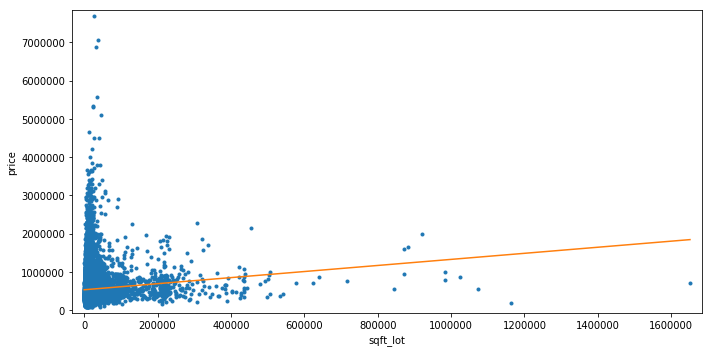

In [67]:
# scatter plot for sqft_lot vs price
reg_plot('sqft_lot', 'price', data=df)

slope = 174588.81258203767
intercept = 279198.51119438396


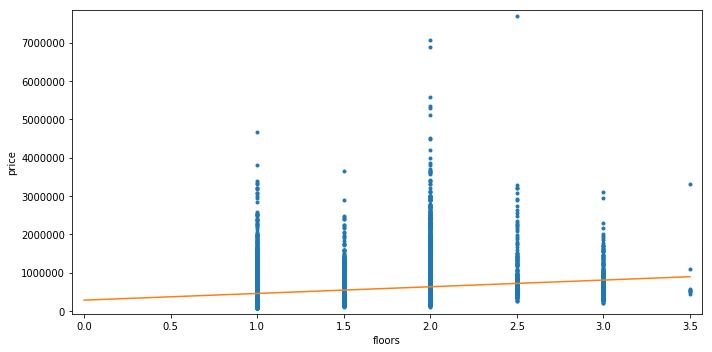

In [68]:
# scatter plot for floors vs price
reg_plot('floors', 'price', data=df)

slope = 1130312.4247263542
intercept = 531563.599813525


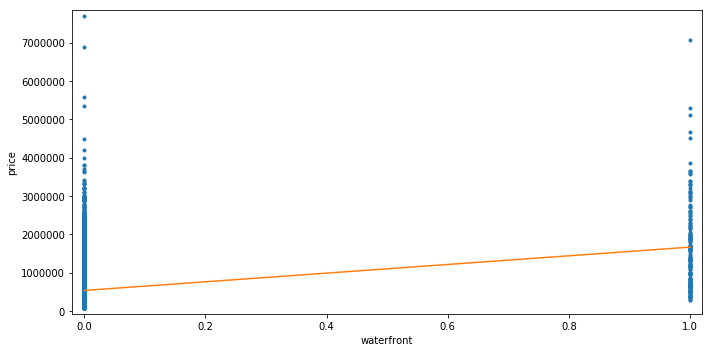

In [69]:
# scatter plot for waterfront vs price
reg_plot('waterfront', 'price', data=df)

slope = 190335.2479268481
intercept = 495491.94061437645


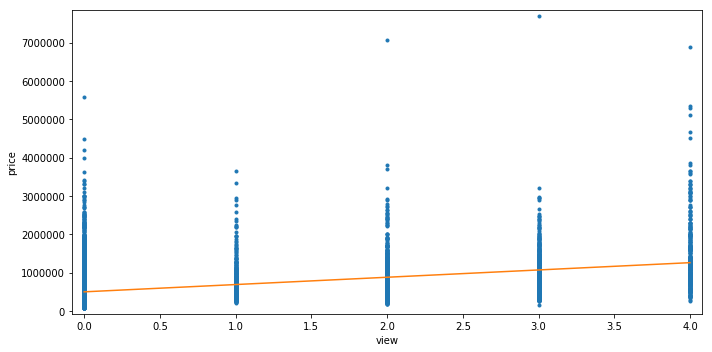

In [70]:
# scatter plot for view vs price
reg_plot('view', 'price', data=df)

slope = 20514.090433341225
intercept = 470146.7964719341


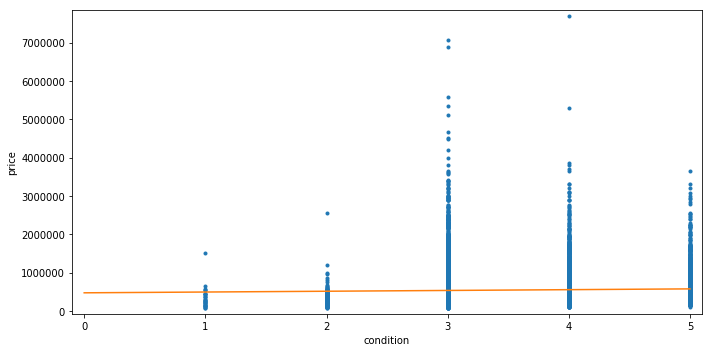

In [71]:
# scatter plot for condition vs price
reg_plot('condition', 'price', data=df)

slope = 208457.56245837876
intercept = -1056044.977009776


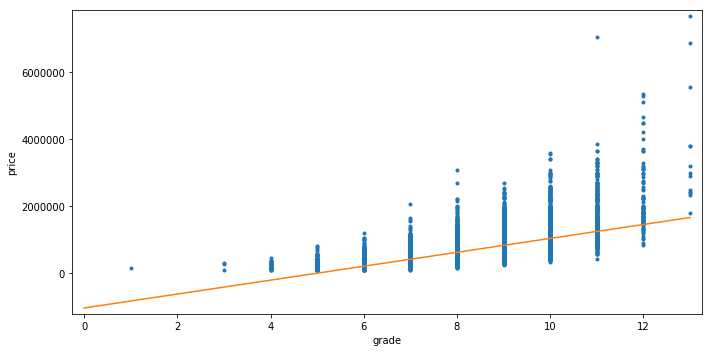

In [72]:
# scatter plot for grade vs price
reg_plot('grade', 'price', data=df)

slope = 268.47318776188905
intercept = 59953.19204700077


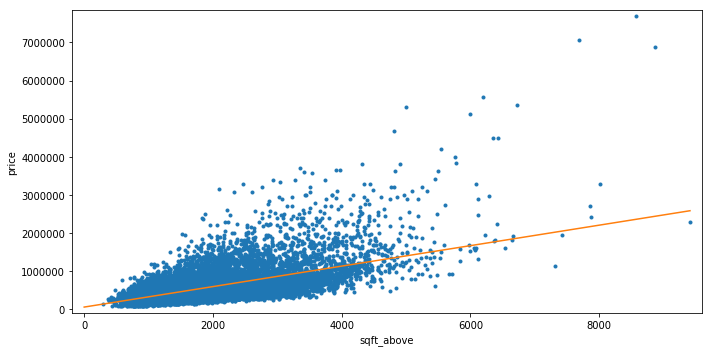

In [73]:
# scatter plot for sqft_above vs price
reg_plot('sqft_above', 'price', data=df)

slope = 268.61358277450546
intercept = 461784.85264846444


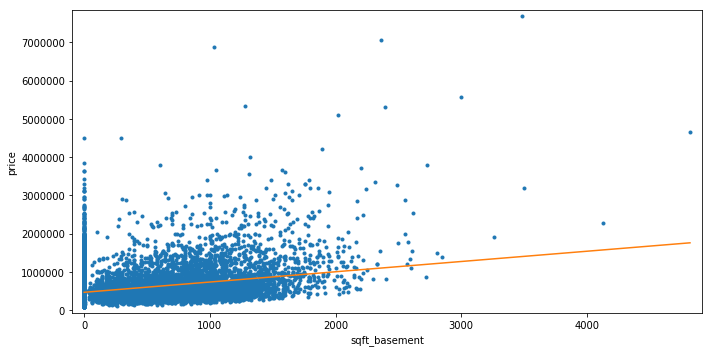

In [74]:
# scatter plot for sqft_basement vs price
reg_plot('sqft_basement', 'price', data=df)

slope = 675.0697856923392
intercept = -790477.8728550595


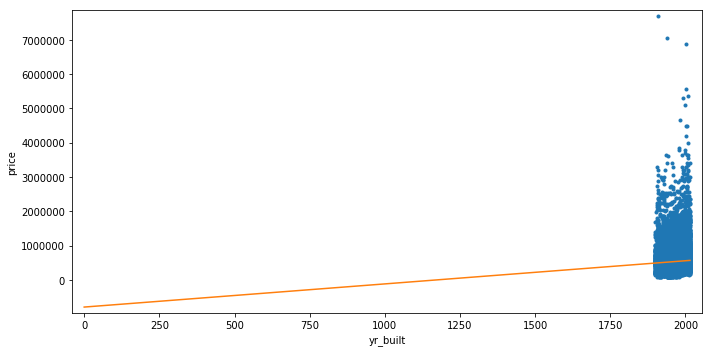

In [75]:
# scatter plot for yr_built vs price
reg_plot('yr_built', 'price', data=df)

slope = 115.55808591056565
intercept = 530334.7783970409


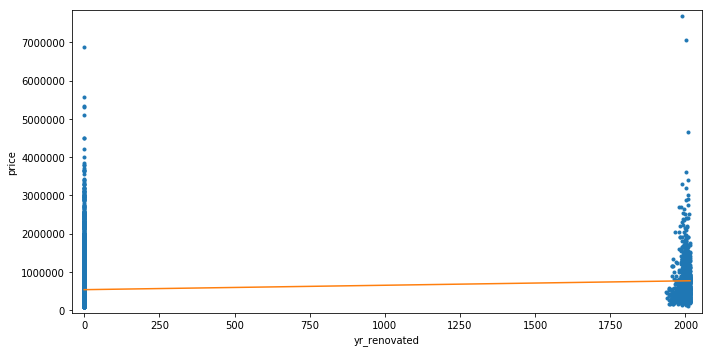

In [76]:
# scatter plot for yr_renovated vs price
reg_plot('yr_renovated', 'price', data=df)

slope = 313.55594157352095
intercept = -82807.19520853956


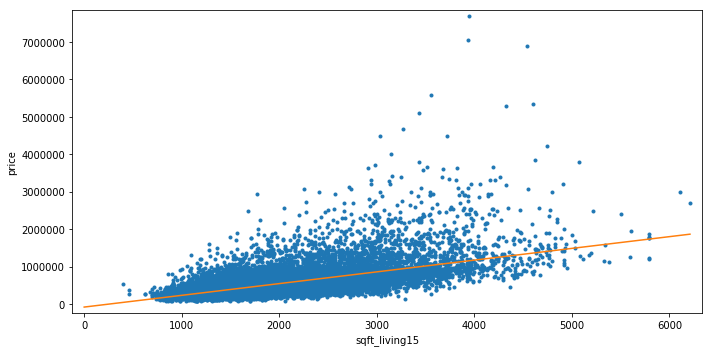

In [77]:
# scatter plot for sqft_living15 vs price
reg_plot('sqft_living15', 'price', data=df)

slope = 1.1085699102169515
intercept = 525933.4160311254


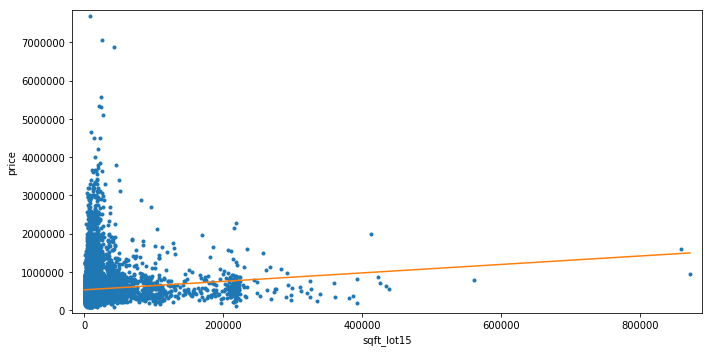

In [78]:
# scatter plot for sqft_lot15 vs price
reg_plot('sqft_lot15', 'price', data=df)